In [15]:
# Importing packages needed
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [16]:
# Reading data into dataframes
Kayaking=pd.read_excel(r"V02Max_Combined.xlsx",sheet_name=0)
Athletes=pd.read_excel(r"V02Max_Combined.xlsx",sheet_name=1)
Triathlon=pd.read_excel(r"V02Max_Combined.xlsx",sheet_name=2)
Fencing=pd.read_excel(r"V02Max_Combined.xlsx",sheet_name=3)

In [17]:
import numpy as np
import pandas as pd
df=[Kayaking,Triathlon,Fencing]
Merged_df=pd.merge(Kayaking,Triathlon,how='outer').merge(Fencing,how='outer')
# Write the final dataframe to an Excel file
Merged_df.to_excel("MergedV02.xlsx", index=False)

In [18]:
# 2)I took 'merged_df' as our dataframe

# Labeling Warm up which has all negative time values
Merged_df.loc[Merged_df['time'] < 0, 'status'] = 'Warm up'

# Labeling GET which has time >= 0 and power > 0
Merged_df.loc[(Merged_df['time'] >= 0) & (Merged_df['power'] > 0), 'status'] = 'GET'

# Assuming cool down starts immediately after GET stage ends:
Merged_df.loc[(Merged_df['time'] >= 0) & (Merged_df['power'] == 0), 'status'] = 'Cool down'

print(Merged_df[['ID','time','RR','power','VO2','status']])

# Saving the final labeled dataframe to an Excel file
Merged_df.to_excel("V02Max_Labeled.xlsx", index=False)

print("Labeled dataframe saved to excel successfully")


       ID     time     RR  power       VO2     status
0       1 -130.840  672.0      0  0.302008    Warm up
1       1 -130.168  672.0      0  0.302008    Warm up
2       1 -129.536  632.0      0  0.301336    Warm up
3       1 -128.824  712.0      0  0.301336    Warm up
4       1 -127.948  876.0      0  0.301336    Warm up
...    ..      ...    ...    ...       ...        ...
52057  18  947.288  536.0      0  0.507071  Cool down
52058  18  947.816  528.0      0  0.507071  Cool down
52059  18  948.344  528.0      0  0.507071  Cool down
52060  18  948.884  540.0      0  0.507071  Cool down
52061  18  949.424  540.0      0  0.507071  Cool down

[52062 rows x 6 columns]
Labeled dataframe saved to excel successfully


## 1)What are the differences in P_vt1 and P_vt2 between different age groups?Weight and Performance:

  age_group       P_vt1                         P_vt2                  
                   mean median        std        mean median        std
0     12-14   97.082758  101.0  31.932839  154.240118  162.0  15.784284
1     15-17  114.684627   80.0  59.777200  195.457505  175.0  74.600105
2     17-18  147.065744  144.0  24.412770  240.794040  267.0  48.368015
ANOVA results for P_vt1: F=6030.506127453237, p=0.0
ANOVA results for P_vt2: F=10937.817675262899, p=0.0


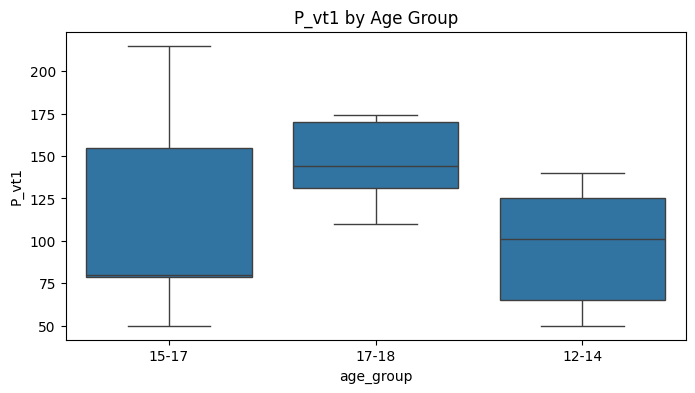

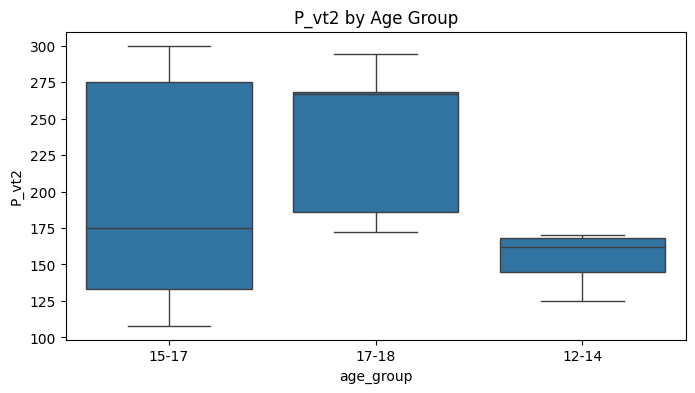

In [19]:
from scipy import stats
# Assuming 'Merged_df' and 'Athletes' are already defined
df = pd.merge(Merged_df, Athletes, on='ID', how='left')

# Create a custom function for age categorization
def age_cat(age):
    if age < 15:
        return '12-14'
    elif 15 <= age < 17:
        return '15-17'
    else:
        return '17-18'

# Apply the categorization to the 'age' column
df['age_group'] = df['age'].apply(age_cat)

# Define labels for age groups
labels = ['12-14', '15-17', '17-18']

# Group by age_group and calculate summary statistics
grouped = df.groupby('age_group').agg({
    'P_vt1': ['mean', 'median', 'std'],
    'P_vt2': ['mean', 'median', 'std']
}).reset_index()

print(grouped)

# Statistical tests (ANOVA)
f_pvt1, p_pvt1 = stats.f_oneway(*[df[df['age_group'] == group]['P_vt1'] for group in labels])
f_pvt2, p_pvt2 = stats.f_oneway(*[df[df['age_group'] == group]['P_vt2'] for group in labels])

print(f"ANOVA results for P_vt1: F={f_pvt1}, p={p_pvt1}")
print(f"ANOVA results for P_vt2: F={f_pvt2}, p={p_pvt2}")

# Visualization
plt.figure(figsize=(8, 4))
sns.boxplot(x='age_group', y='P_vt1', data=df)
plt.title('P_vt1 by Age Group')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='age_group', y='P_vt2', data=df)
plt.title('P_vt2 by Age Group')
plt.show()


## 2)What are the trends in VO2 and power throughout the different phases of exercise?



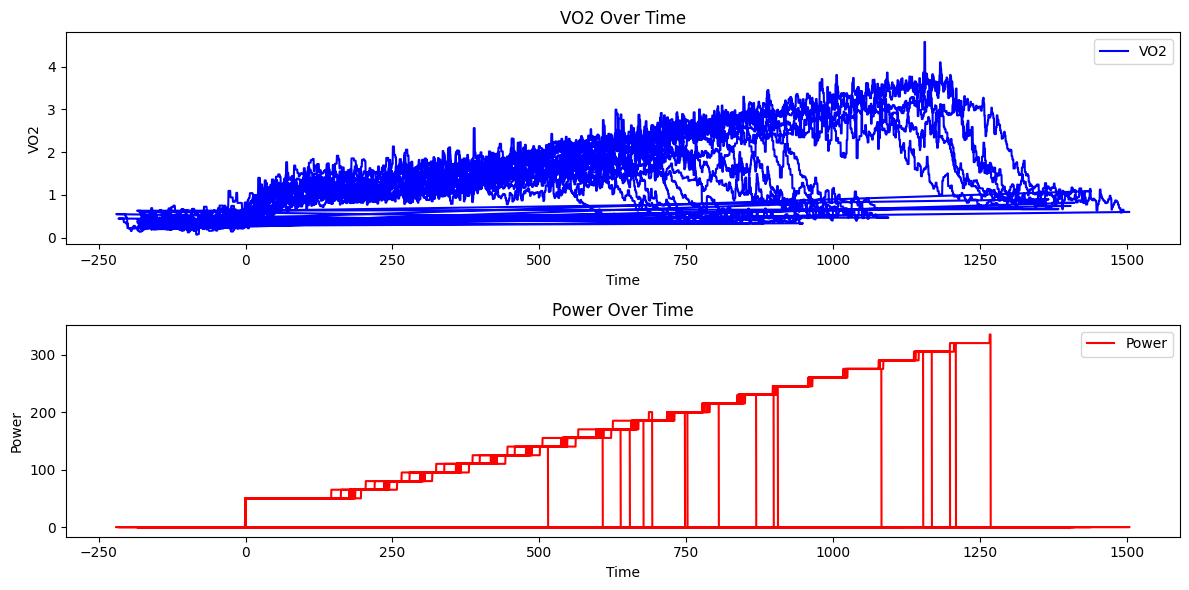

In [20]:
from scipy import stats
# Separate data by phases
warm_up_df = df[df['time'] < 0]
get_df = df[df['time'] >= 0]  # Modify as per actual GET phase definition
cool_down_df = df[df['time'] > df['time'].max() - 10]  # Modify as per actual Cool-down phase definition

# Plot VO2 and Power over Time
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df['time'], df['VO2'], label='VO2', color='b')
plt.xlabel('Time')
plt.ylabel('VO2')
plt.title('VO2 Over Time')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['time'], df['power'], label='Power', color='r')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power Over Time')
plt.legend()

plt.tight_layout()
plt.show()

## 3)# Visualization of Relationship between VO2 and Power

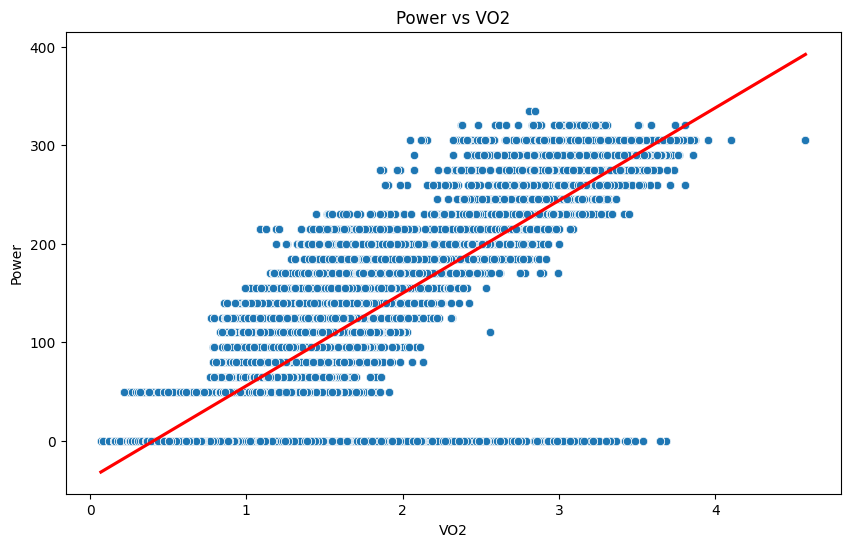

In [21]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='VO2', y='power', data=df)
sns.regplot(x='VO2', y='power', data=df, scatter=False, color='r')
plt.xlabel('VO2')
plt.ylabel('Power')
plt.title('Power vs VO2')
plt.show()

## 4)How does age correlate with P_vt1 and P_vt2 values?

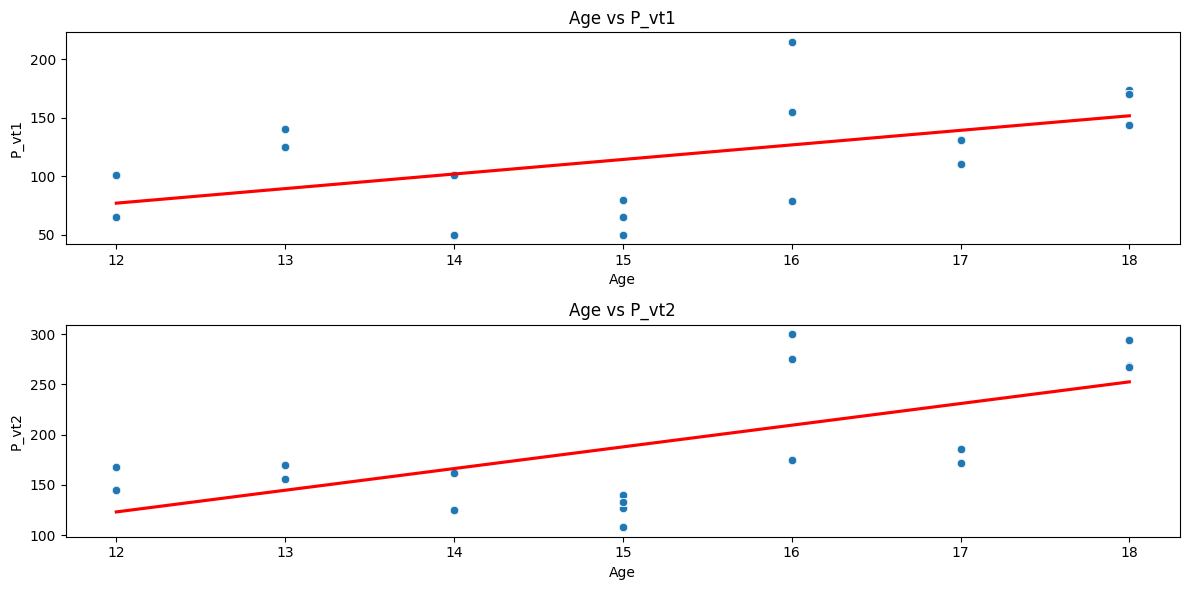

In [22]:
# Visualization
plt.figure(figsize=(12, 6))

# Scatter plot for age vs P_vt1
plt.subplot(2, 1, 1)
sns.scatterplot(x='age', y='P_vt1', data=df)
sns.regplot(x='age', y='P_vt1', data=df, scatter=False, color='r')
plt.xlabel('Age')
plt.ylabel('P_vt1')
plt.title('Age vs P_vt1')

# Scatter plot for age vs P_vt2
plt.subplot(2, 1, 2)
sns.scatterplot(x='age', y='P_vt2', data=df)
sns.regplot(x='age', y='P_vt2', data=df, scatter=False, color='r')
plt.xlabel('Age')
plt.ylabel('P_vt2')
plt.title('Age vs P_vt2')

plt.tight_layout()
plt.show()

## 5)How does the variability in heart rate (RR) correlate with power output and VO2?



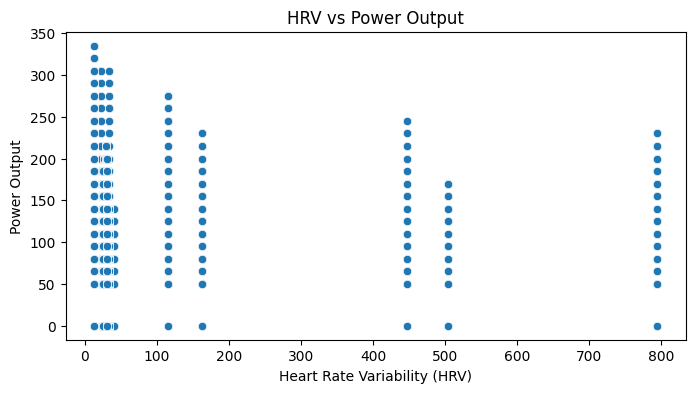

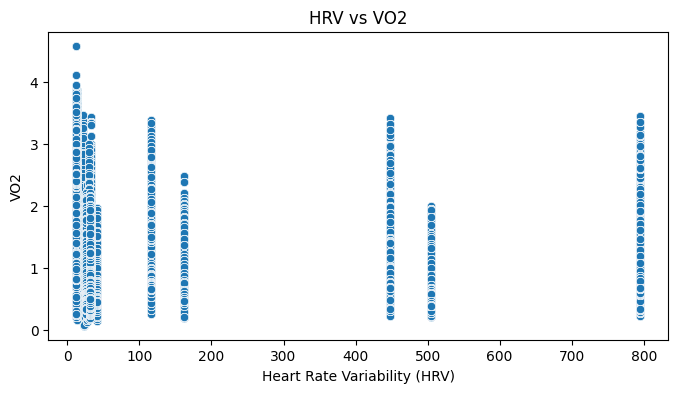

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


Merged_df['RR']=Merged_df['RR'].ffill()
Merged_df['rr_diff']=Merged_df['RR'].diff()
Merged_df['rr_diff']=Merged_df['rr_diff'].fillna(0)
Merged_df['hrv']=Merged_df.groupby('ID')['rr_diff'].transform('std')

# Scatter plot for HRV vs Power Output
plt.figure(figsize=(8, 4))
sns.scatterplot(x='hrv', y='power', data=Merged_df)
plt.title('HRV vs Power Output')
plt.xlabel('Heart Rate Variability (HRV)')
plt.ylabel('Power Output')
plt.show()

# Scatter plot for HRV vs VO2
plt.figure(figsize=(8, 4))
sns.scatterplot(x='hrv', y='VO2', data=Merged_df)
plt.title('HRV vs VO2')
plt.xlabel('Heart Rate Variability (HRV)')
plt.ylabel('VO2')
plt.show()

## 6)How do heart rates and power outputs compare to benchmarks based on age?



Correlation between Heart Rate and Power Output: 0.6469907062177584


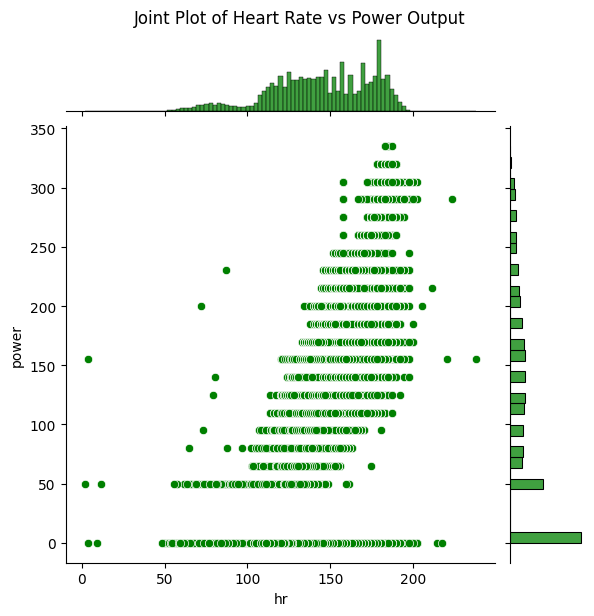

In [27]:
Merged_df['hr']=60/(Merged_df['RR']/1000)
# Assuming Merged_df contains 'HR' (or a similar column for heart rate) and 'power'
correlation = Merged_df['hr'].corr(Merged_df['power'])
print(f'Correlation between Heart Rate and Power Output: {correlation}')
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(x='hr', y='power', data=Merged_df, kind='scatter', color='green')
plt.suptitle('Joint Plot of Heart Rate vs Power Output', y=1.02)
plt.show()

## 7)What is the relationship between age and VO2 values, and does it differ by gender or sport?

Correlation between Age and VO2: 0.3892999515879632


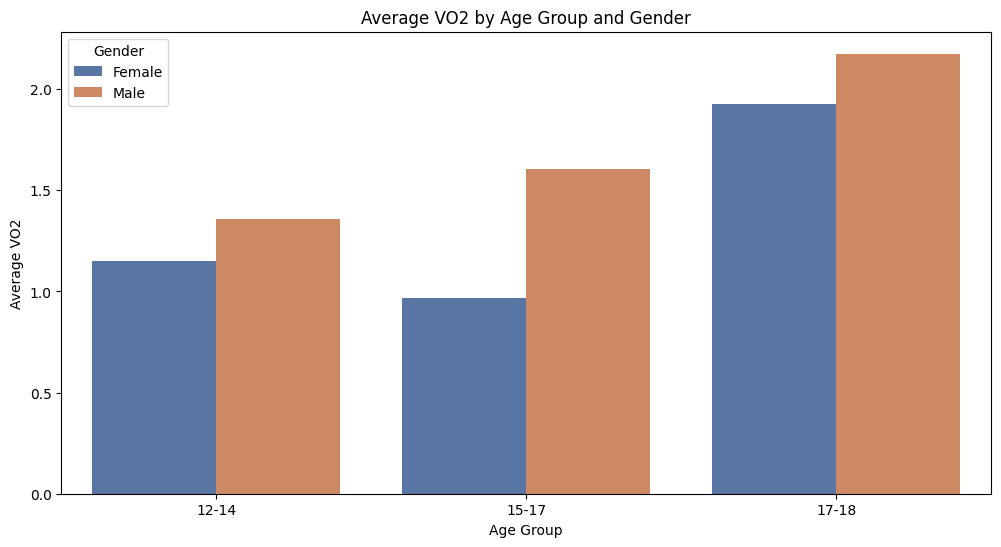

In [28]:
# Calculate Pearson correlation coefficient
correlation_age_vo2 = df['age'].corr(df['VO2'])

print(f'Correlation between Age and VO2: {correlation_age_vo2}')
# Calculate average VO2 for each age group and gender
age_gender_vo2 = df.groupby(['age_group', 'Gender'])['VO2'].mean().reset_index()

# Bar chart for average VO2 by Age Group and Gender
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='VO2', hue='Gender', data=age_gender_vo2, palette='deep')
plt.title('Average VO2 by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average VO2')
plt.show()


## 8)How does weight impact the P_vt1 and P_vt2 values?

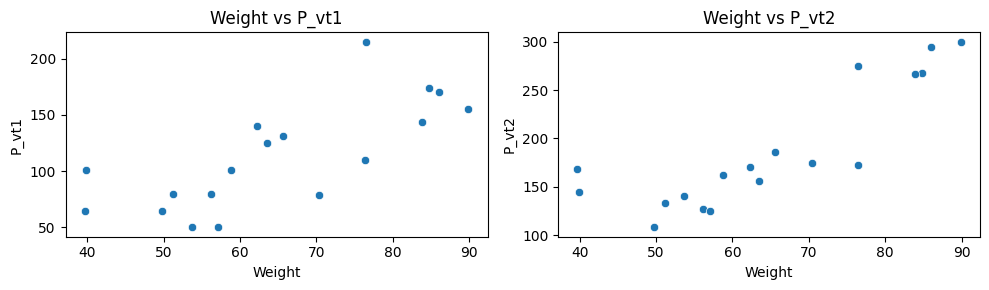

In [29]:
# Creating a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Scatter plot for Weight vs P_vt1
sns.scatterplot(x='Weight', y='P_vt1', data=Athletes, ax=axes[0])
axes[0].set_title('Weight vs P_vt1')
axes[0].set_xlabel('Weight')
axes[0].set_ylabel('P_vt1')

# Scatter plot for Weight vs P_vt2
sns.scatterplot(x='Weight', y='P_vt2', data=Athletes, ax=axes[1])
axes[1].set_title('Weight vs P_vt2')
axes[1].set_xlabel('Weight')
axes[1].set_ylabel('P_vt2')

# Adjust layout
plt.tight_layout()
plt.show()

## 9)How does heart rate (RR) change over time during the exercise phases?

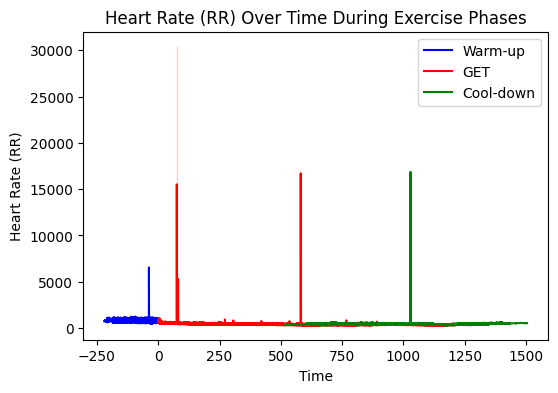

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot for each phase
plt.figure(figsize=(6, 4))

# Plot Warm-up phase
warm_up_data = Merged_df[Merged_df['status'] == 'Warm up']
sns.lineplot(x='time', y='RR', data=warm_up_data, label='Warm-up', color='blue')

# Plot GET phase
get_data = Merged_df[Merged_df['status'] == 'GET']
sns.lineplot(x='time', y='RR', data=get_data, label='GET', color='red')

# Plot Cool-down phase
cool_down_data = Merged_df[Merged_df['status'] == 'Cool down']
sns.lineplot(x='time', y='RR', data=cool_down_data, label='Cool-down', color='green')

plt.title('Heart Rate (RR) Over Time During Exercise Phases')
plt.xlabel('Time')
plt.ylabel('Heart Rate (RR)')
plt.legend()
plt.show()
